# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
#base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weaterh_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather = requests.get(url).json()
    try:
#         # Parse the JSON and retrieve data
#         city_weather = # YOUR CODE HERE
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = # YOUR CODE HERE
#         city_lng = # YOUR CODE HERE
#         city_max_temp = # YOUR CODE HERE
#         city_humidity = # YOUR CODE HERE
#         city_clouds = # YOUR CODE HERE
#         city_wind = # YOUR CODE HERE
#         city_country = # YOUR CODE HERE
#         city_date = # YOUR CODE HERE

#         # Append the City information into city_data list
         city_data.append({"City": city, 
                            "Lat": weather["coord"]["lat"], 
                            "Lng": weather["coord"]["lon"], 
                            "Max Temp": weather["main"]["temp_max"],
                            "Humidity": weather["main"]["humidity"],
                            "Cloudiness": weather["clouds"]["all"],
                            "Wind Speed": weather["wind"]["speed"],
                            "Country": weather["sys"]["country"],
                            "Date": time.ctime(weather['dt'])})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")       
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iwanai
Processing Record 2 of Set 1 | el bauga
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | sosnovka
Processing Record 6 of Set 1 | sparti
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | abbeville
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | piacabucu
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | razdol'noye
Processing Record 18 of Set 1 | fangshan
Processing Record 19 of Set 1 | burao
Processing Record 20 of Set 1 | plainview
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | punta arenas
Processing Rec

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iwanai,42.9744,140.5089,70.99,92,4,4.41,JP,Fri Aug 11 15:55:25 2023
1,el bauga,18.2620,33.9081,97.95,24,23,5.66,SD,Fri Aug 11 15:55:25 2023
2,olonkinbyen,70.9221,-8.7187,44.83,99,100,5.19,SJ,Fri Aug 11 15:55:26 2023
3,adamstown,-25.0660,-130.1015,65.61,51,11,19.42,PN,Fri Aug 11 15:55:26 2023
4,sosnovka,56.2550,51.2842,62.26,66,2,1.28,RU,Fri Aug 11 15:55:27 2023


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iwanai,42.9744,140.5089,70.99,92,4,4.41,JP,Fri Aug 11 15:55:25 2023
1,el bauga,18.2620,33.9081,97.95,24,23,5.66,SD,Fri Aug 11 15:55:25 2023
2,olonkinbyen,70.9221,-8.7187,44.83,99,100,5.19,SJ,Fri Aug 11 15:55:26 2023
3,adamstown,-25.0660,-130.1015,65.61,51,11,19.42,PN,Fri Aug 11 15:55:26 2023
4,sosnovka,56.2550,51.2842,62.26,66,2,1.28,RU,Fri Aug 11 15:55:27 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

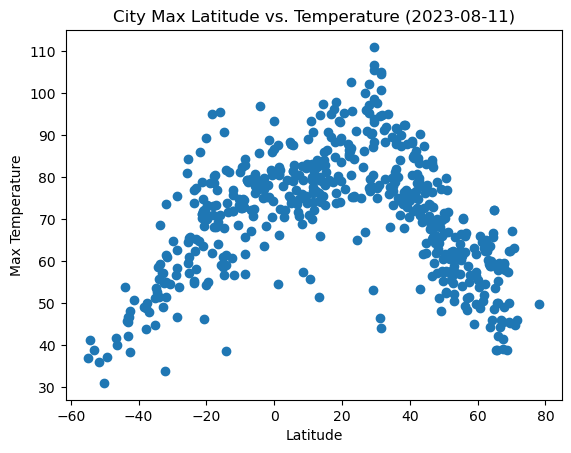

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

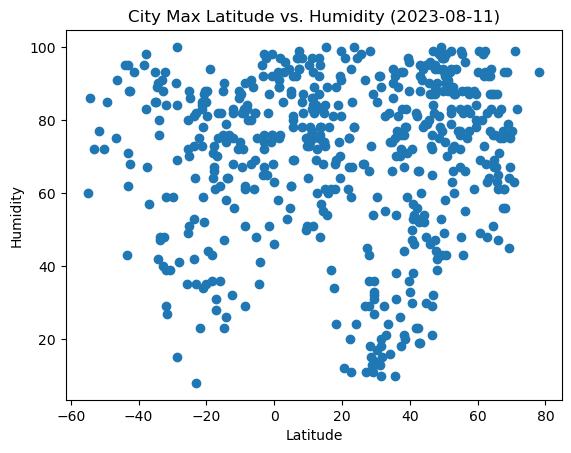

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.Lat, city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

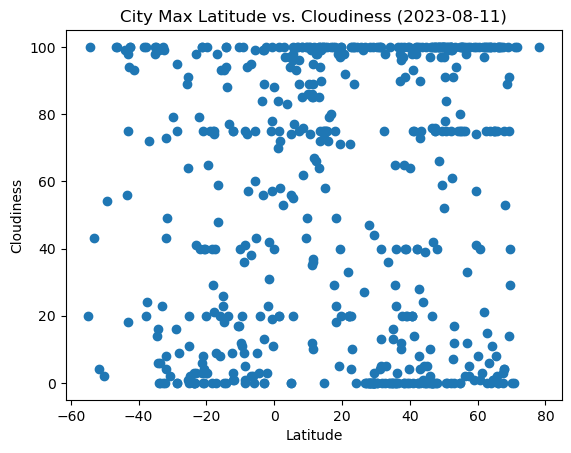

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

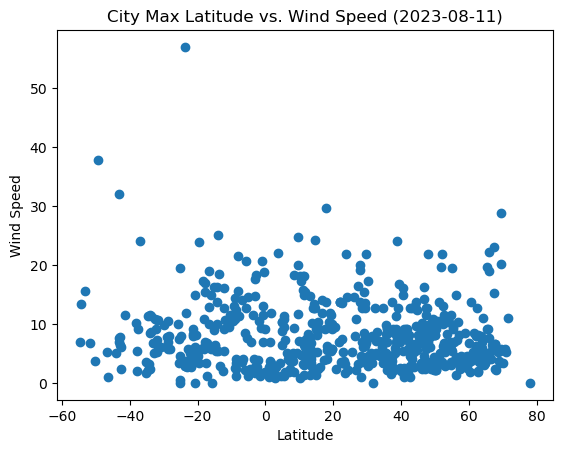

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def lin_funct(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return rvalue 
    plt.show()

-0.09367290631358255

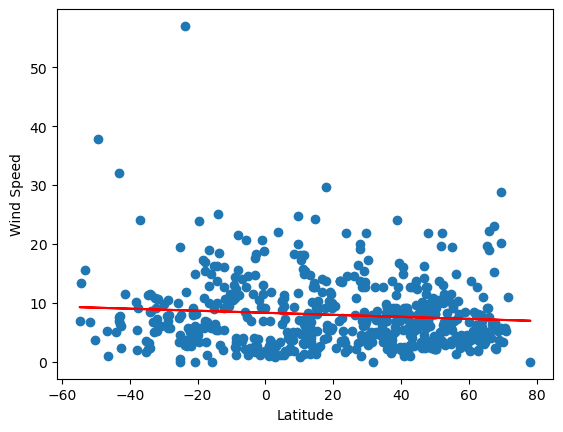

In [60]:
lin_funct(city_data_df.Lat, city_data_df["Wind Speed"], "Latitude", "Wind Speed")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df.Lat>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iwanai,42.9744,140.5089,70.99,92,4,4.41,JP,Fri Aug 11 15:55:25 2023
1,el bauga,18.2620,33.9081,97.95,24,23,5.66,SD,Fri Aug 11 15:55:25 2023
2,olonkinbyen,70.9221,-8.7187,44.83,99,100,5.19,SJ,Fri Aug 11 15:55:26 2023
4,sosnovka,56.2550,51.2842,62.26,66,2,1.28,RU,Fri Aug 11 15:55:27 2023
5,sparti,37.0733,22.4297,70.95,70,90,1.43,GR,Fri Aug 11 15:55:27 2023


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df.Lat<=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,65.61,51,11,19.42,PN,Fri Aug 11 15:55:26 2023
7,invercargill,-46.4000,168.3500,40.01,91,100,1.01,NZ,Fri Aug 11 15:55:28 2023
9,waitangi,-43.9535,-176.5597,53.82,95,99,5.01,NZ,Fri Aug 11 15:55:28 2023
10,fale old settlement,-9.3852,-171.2468,82.49,67,20,13.09,TK,Fri Aug 11 15:55:28 2023
11,puerto natales,-51.7236,-72.4875,35.92,77,4,6.85,CL,Fri Aug 11 15:55:29 2023


###  Temperature vs. Latitude Linear Regression Plot

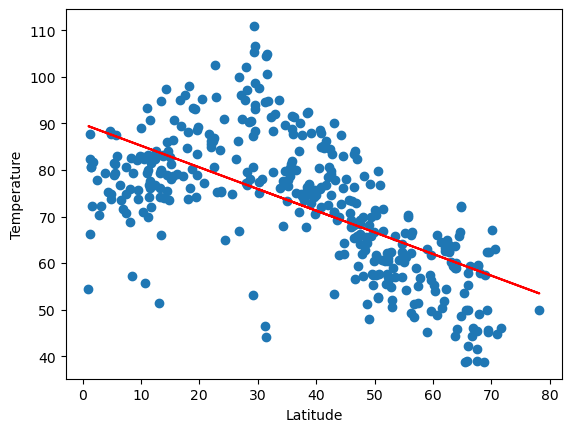

-0.6372082728403465

In [39]:
# Linear regression on Northern Hemisphere
lin_funct(northern_hemi_df.Lat, northern_hemi_df["Max Temp"], "Latitude", "Temperature")

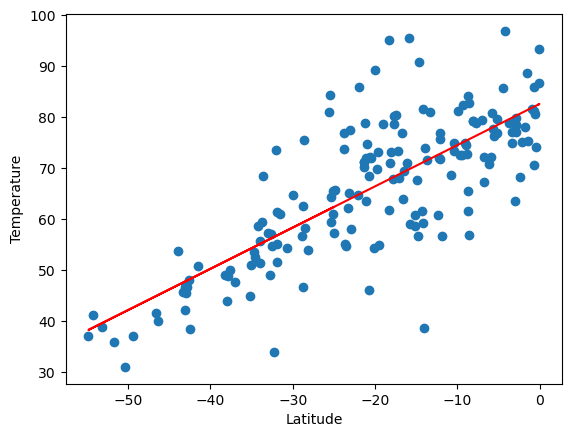

0.77464836805404

In [ ]:
# Linear regression on Southern Hemisphere
lin_funct(southern_hemi_df.Lat, southern_hemi_df["Max Temp"], "Latitude", "Temperature")

**Discussion about the linear relationship:** As you can see with the linear regression plots as you approach the equator the temperature rises and as you get further from the equator it gets colder (has a lower temperature).

### Humidity vs. Latitude Linear Regression Plot

0.034320912934352896

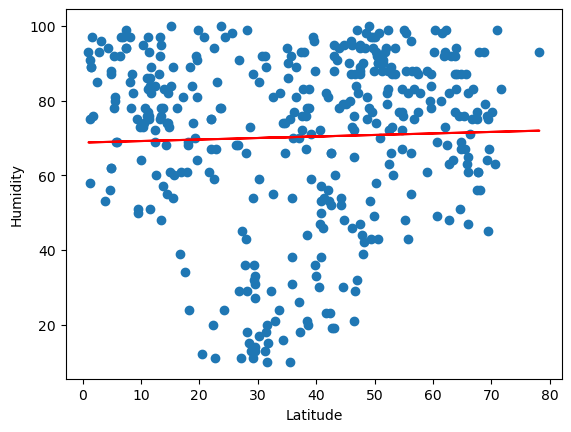

In [54]:
# Northern Hemisphere
lin_funct(northern_hemi_df.Lat, northern_hemi_df["Humidity"], "Latitude", "Humidity")

-0.013522524285061902

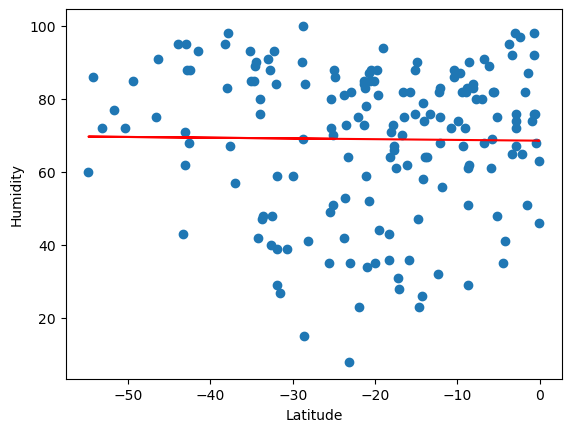

In [56]:
# Southern Hemisphere
lin_funct(southern_hemi_df.Lat, southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

-0.09972838511552318

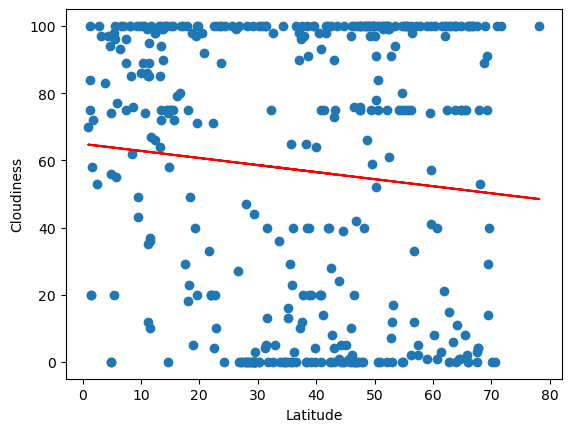

In [57]:
# Northern Hemisphere
lin_funct(northern_hemi_df.Lat, northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

-0.08832285911050981

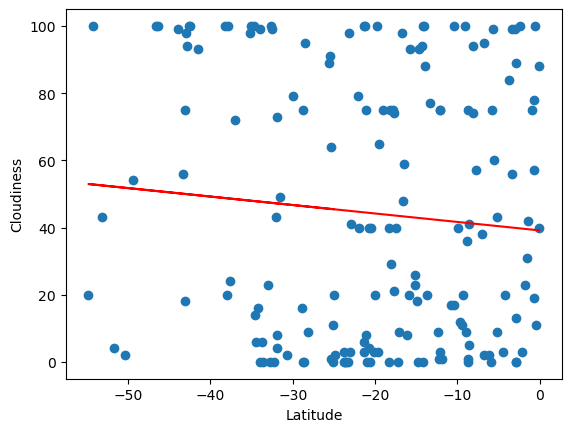

In [58]:
# Southern Hemisphere
lin_funct(southern_hemi_df.Lat, southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

-0.03526143307273231

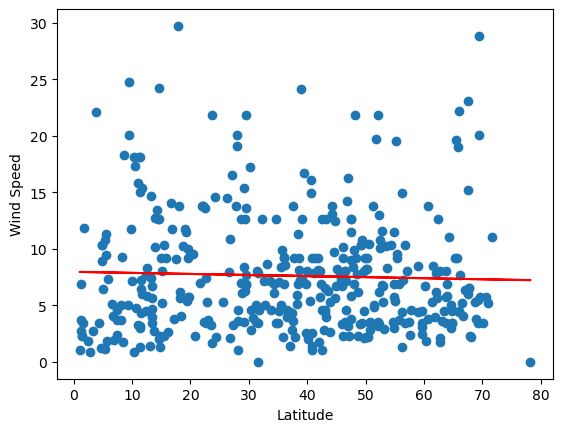

In [62]:
# Northern Hemisphere
lin_funct(northern_hemi_df.Lat, northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

0.0009206355320745984

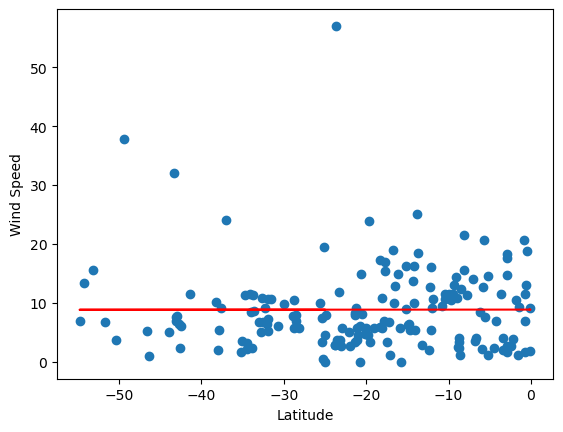

In [63]:
# Southern Hemisphere
lin_funct(southern_hemi_df.Lat, southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE